# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [35]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [ ]:
# Your code here.
#converting into dataframe
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

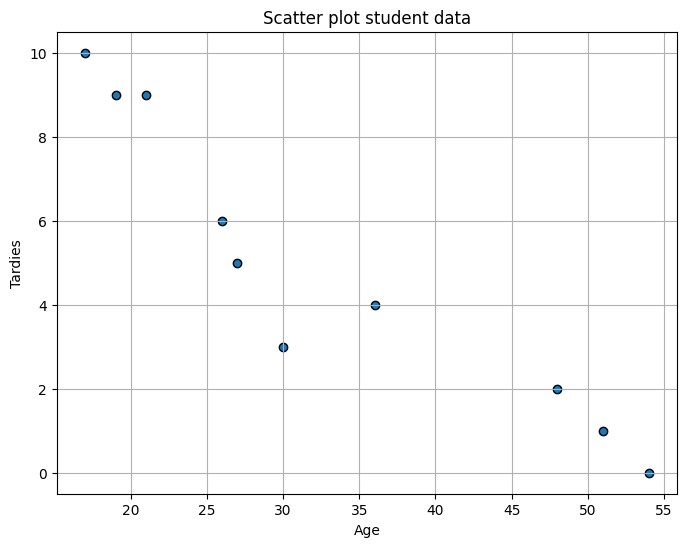

In [ ]:
# Your code here
#Scatter plot to find a connection between the data
plt.figure(figsize=(8,6))
plt.scatter(student_data["Age"],student_data["Tardies"],edgecolors= "black")
plt.title("Scatter plot student data")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

<!-- *your explanation here* -->
The lesser the age the more tardies and higher the age the lesser the tardies 
In other words if the student is younger the tardies are more and if the student is a bit higher in age the tardies are lesser

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
# your code here
#Covariance and correlation 
#Negative covariance means if one value increases the other value decreases and vice versa 
#Positive covariance means if one value increases the other also increases and vice versa
#Correlation is a standard value for the covariance positive both moves in same direction 
#Negative means both goes in different direction
covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

print(f"Covariance: {covariance:.4f}")
print(f"Correlation: {correlation:.4f}")

Covariance: -45.5667
Correlation: -0.9392


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
#Giving a Label to the values in Tardies 
student_data["Labels"] = student_data["Tardies"].apply(lambda x : 1 if x >= 5 else 0 )
student_data

,Age,Tardies,Labels
0,17,10,1
1,51,1,0
2,27,5,1
3,21,9,1
4,36,4,0
5,48,2,0
6,19,9,1
7,26,6,1
8,54,0,0
9,30,3,0


In [ ]:
# your explanation here
#X Y train test split 
X = student_data[["Age"]]
Y = student_data[["Labels"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)



In [ ]:
#KNeighhbors classifier 
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
#Fitting in the model
knn.fit(X_train, Y_train)

c:\Users\JITHIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
single_student = student_data[['Age']].iloc[[1]]
prediction = knn.predict(single_student)
print("Predicted Label:", prediction[0])

Predicted Label: 0


In [58]:
y_predict = knn.predict(X_test)
y_predict

array([1, 0])

In [ ]:
from sklearn import metrics
#As the data is very small there is a 100 percent Accuracy for the model
#And the model is ready to predict the test sets
metrics.accuracy_score(Y_test, y_predict)

1.0

Plot your regression model on your scatter plot.

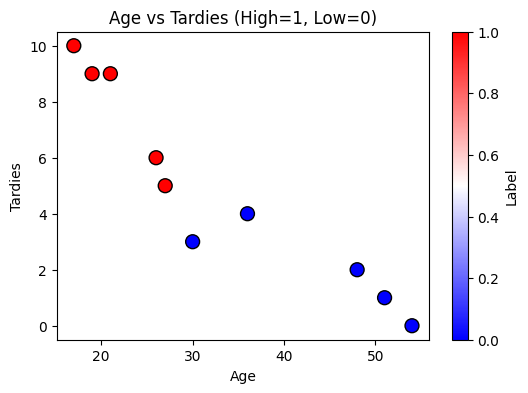

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    student_data['Age'],
    student_data['Tardies'],
    c=student_data['Labels'],
    cmap='bwr',
    edgecolor='k',
    s=100
)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies (High=1, Low=0)')
plt.colorbar(label='Label')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [68]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [69]:
# Your code here.
variables = [
    'Year', 
    'Cylinders', 
    'Fuel Barrels/Year', 
    'Combined MPG', 
    'Fuel Cost/Year', 
    'CO2 Emission Grams/Mile'
]

In [70]:
df_selected = vehicles[variables]

In [71]:
correlations = df_selected.corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False)
print(correlations)

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [73]:
df_selected

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [74]:
# Your code here.
X = df_selected[[
    'Year', 
    'Cylinders', 
    'Fuel Barrels/Year', 
    'Combined MPG', 
    'Fuel Cost/Year']]

y = df_selected[["CO2 Emission Grams/Mile"]]

In [75]:
X_train, X_test, y_train , y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
y_pred = model.predict(X_test)
print("Score:", model.score(X_test, y_test))

Score: 0.9854330281460434


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your code here.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [81]:
# Your code here.
partydf = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Visited': [1,2,4,4,5,7,8,13]})
partydf

,Invited,Visited
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*